In [1]:
import numpy as np
import matplotlib.pyplot as plt

train_5 = np.loadtxt('./train5_oddYr.txt',dtype = float)
five_labels = np.ones((train_5.shape[0],1)) # these will be zeros

train_3 = np.loadtxt('./train3_oddYr.txt',dtype = float)
three_labels = np.zeros((train_3.shape[0],1)) # these are the ones

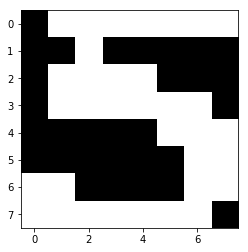

In [2]:
plt.imshow(train_5[0].reshape((8,8)), cmap  = 'gray')
plt.show()

In [3]:
train_data = np.vstack((train_3,train_5))
target_data = np.vstack((three_labels,five_labels))

log likelihood: $L = \sum^{T}{y_t\log{\sigma_{wx}}+(1-y_t)\log{\sigma_{-wx}}}$

##### Update Rule: 

$W_{i+1} = W_i + \eta(\sum^{T}{(y_t - \sigma_{wx})*x_{it}})$

In [4]:
def sigmoid(weights,x,b):
    sig = (1/(1+math.exp(-1*weights@x+b)))
    return(sig)

In [5]:
def likelihood(input_data,target_data,weights):
    L = 0
    for i in range(len(train_data)):
        L += (target_data[i]*math.log(sigmoid(weights,input_data[i]))+\
             (1-target_data[i])*math.log(sigmoid(weights,-1*input_data[i])))   
    return L

In [6]:

# routine to use the errors to calculate the weight update
def calc_grad(weights,train_data,target_data):

    dL_dWi = np.zeros((len(weights)))
    for i in range(len(weights)):
        grad_update = 0                   # stores our total weight updates       
        for t in range(len(target_data)): # iterate over all of the data_ppoints
        
            # dL_dWi = (y_t - sigma(wx_t))*x_it
            delta = (target_data[t] - sigmoid(weights,train_data[t]))\
                    *train_data[t,i]
            grad_update +=delta           # accumulate the weight update over samples
            
        # after seeing the whole set, update the weight for the ith weight element
        dL_dWi[i]=grad_update 
        
    return dL_dWi
    

In [7]:
def predict_y(input_data,target_data,weights):
    y_pred = sigmoid(weights,input_data)
    if y_pred > .5:
        y_pred = 1
    else:
        y_pred = 0
    
    return y_pred

## Gradient Update Routine

In [19]:
# initialize random weights
import math
L = 0
weights = np.random.uniform(size = len(train_data[0]))
learning_rate = .02/800


for i in range(3001):
    # calculate log likelihood
    like = likelihood(train_data,target_data,weights=weights)

    # calculate our prediction accuracy for our set
    accuracy = 0
    for j in range(len(target_data)):
        y_pred = predict_y(train_data[j],target_data[j],
                           weights=weights) # returns 0 or 1
        
        if y_pred == target_data[j]:
            accuracy +=1
        
    # normalize the accuracy - out of 1400
    accuracy=accuracy/len(target_data)
    
    # calculate the gradient of the weights
    dW = calc_grad(weights,train_data,target_data)
    #update the weights
    weights = weights + learning_rate*dW
    
    if i%20 == 0:
        print('iteration %i: likelihood: %f  accuracy: %f'%(i,like,accuracy))


iteration 0: likelihood: -11214.831757  accuracy: 0.500000
iteration 20: likelihood: -5687.192262  accuracy: 0.500000
iteration 40: likelihood: -1186.064471  accuracy: 0.611429
iteration 60: likelihood: -736.553472  accuracy: 0.758571
iteration 80: likelihood: -674.706778  accuracy: 0.783571
iteration 100: likelihood: -627.398417  accuracy: 0.811429
iteration 120: likelihood: -588.928272  accuracy: 0.827143
iteration 140: likelihood: -556.952564  accuracy: 0.835714
iteration 160: likelihood: -529.888098  accuracy: 0.847143
iteration 180: likelihood: -506.630923  accuracy: 0.850714
iteration 200: likelihood: -486.390842  accuracy: 0.858571
iteration 220: likelihood: -468.587949  accuracy: 0.862857
iteration 240: likelihood: -452.786711  accuracy: 0.872143
iteration 260: likelihood: -438.653089  accuracy: 0.875000
iteration 280: likelihood: -425.926039  accuracy: 0.879286
iteration 300: likelihood: -414.398136  accuracy: 0.883571
iteration 320: likelihood: -403.902132  accuracy: 0.889286

iteration 2760: likelihood: -208.417492  accuracy: 0.951429
iteration 2780: likelihood: -208.144505  accuracy: 0.952143
iteration 2800: likelihood: -207.874943  accuracy: 0.952143
iteration 2820: likelihood: -207.608738  accuracy: 0.952143
iteration 2840: likelihood: -207.345824  accuracy: 0.952857
iteration 2860: likelihood: -207.086135  accuracy: 0.952857
iteration 2880: likelihood: -206.829608  accuracy: 0.952857
iteration 2900: likelihood: -206.576181  accuracy: 0.952857
iteration 2920: likelihood: -206.325796  accuracy: 0.952857
iteration 2940: likelihood: -206.078393  accuracy: 0.953571
iteration 2960: likelihood: -205.833916  accuracy: 0.953571
iteration 2980: likelihood: -205.592309  accuracy: 0.953571
iteration 3000: likelihood: -205.353519  accuracy: 0.954286


### Visualize the Weights

<function matplotlib.pyplot.show(*args, **kw)>

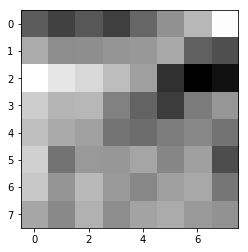

In [20]:
vis_weights = np.reshape(weights,(8,8))

plt.imshow(vis_weights,cmap = 'gray')
plt.show

# Calculate Accuracy

In [21]:
test_5 = np.loadtxt('./test5_oddYr.txt',dtype = float)
five_labels_test = np.ones((test_5.shape[0],1)) # these will be zeros

test_3 = np.loadtxt('./test3_oddYr.txt',dtype = float)
three_labels_test = np.zeros((test_3.shape[0],1)) # these are the ones

In [22]:
test_input = np.vstack((test_3,test_5))
test_target = np.vstack((three_labels_test,five_labels_test))

In [23]:
accuracy = 0
for i in range(len(test_input)):

    # returns 0 or 1
    y_pred = predict_y(test_input[i],test_target[i],weights=weights) 

    if y_pred == test_target[i]:
        accuracy +=1
        

percent_accuracy = accuracy/len(test_input)
        

In [24]:
percent_accuracy

0.94875